# News Categorizer

Predicts news article categories by headline text.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import unicodedata
import string
import os
import csv
import re

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
#need onehot?
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.utils import shuffle

import sklearn.metrics as skm

In [2]:
news_df = pd.read_csv(os.path.join('news-data', 'uci-news-aggregator.csv'), header=0, index_col=0, dtype=str)
print('Read .csv file from local copy of dataset.')

Read .csv file from local copy of dataset.


In [3]:
news_df.head()

,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
ID,,,,,,,
1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [4]:
news_df.isnull().sum()

TITLE        0
URL          0
PUBLISHER    2
CATEGORY     0
STORY        0
HOSTNAME     0
TIMESTAMP    0
dtype: int64

In [5]:
category_dict = {
    'b':'business',
    'e':'entertainment',
    'm':'health',
    't':'science/technology'
}

news_df['CATEGORY'] = news_df['CATEGORY'].map(category_dict)

In [6]:
news_df.head()

,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
ID,,,,,,,
1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,business,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,business,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,business,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,business,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,business,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [8]:
def remove_punctuation(s1):
    """
    Returns s1 unicode-normalised without punctuation that is not
    word-internal (e.g., hyphens, apostrophes) removed.
    """
    # TODO: optimise with pandas' str replace
    s1 = s1.translate(str.maketrans('', '', string.punctuation))
    # remove punctuation that is not word-internal (e.g., hyphens, apostrophes)
    #s1 = re.sub('\b\W+',' ',s1)
    #s1 = re.sub('\W+\b',' ',s1)
    s1 = re.sub('(\b\W+)|(\W+\b)',' ',s1)
    return unicodedata.normalize("NFKD", s1)

In [ ]:
news_df['TITLE'] = news_df['TITLE'].str.lower()
news_df['TITLE'] = news_df['TITLE'].apply(remove_punctuation)

# features = news_df[['TITLE']]
# labels = news_df[['CATEGORY']]

In [406]:
vectorizer = CountVectorizer()
vectorizer.fit(news_df['TITLE'])
features = vectorizer.transform(news_df['TITLE'])

encoder = LabelEncoder()
encoder.fit(news_df['CATEGORY'])
labels = encoder.transform(news_df['CATEGORY'])

<422419x71822 sparse matrix of type '<class 'numpy.int64'>'
	with 3707525 stored elements in Compressed Sparse Row format>

In [303]:
# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((337935, 71822), (84484, 71822), (337935,), (84484,))

In [304]:
nb = MultinomialNB()
nb.fit(x_train, y_train)

nb.score(x_test, y_test)
#0.9269684200558685

0.9265896501112637

In [305]:
sgd = SGDClassifier(early_stopping=True)
sgd.fit(x_train, y_train)

#pred=SGD.predict(x_test)
sgd.score(x_test, y_test)

0.937278064485583

In [234]:
# from sklearn.svm import LinearSVC

# svc = LinearSVC()
# svc.fit(x_train, y_train)
# svc.score(x_test, y_test)

In [235]:
# from sklearn.ensemble import RandomForestClassifier

# forest = RandomForestClassifier()
# forest = forest.fit(x_train, y_train)
# forest.score(x_test, y_test)

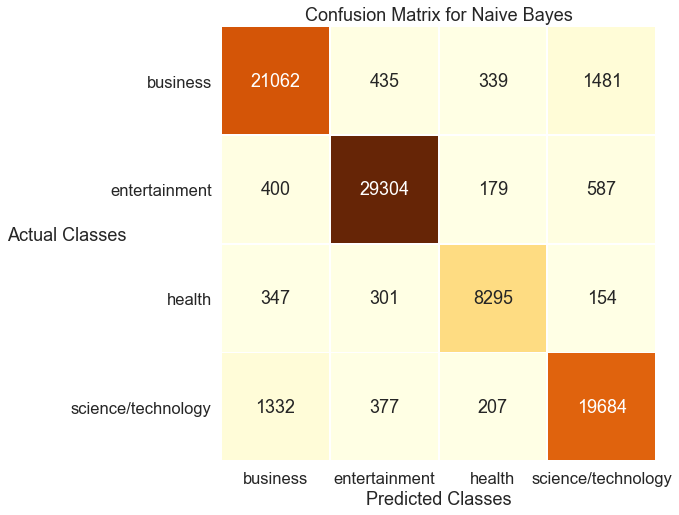

In [228]:
def confusion_mat(model_name, confusion_matrix, cmap='YlOrBr'):
    #hardcoded index and columns
    cof=pd.DataFrame(confusion_matrix)
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8,8))

    sns.heatmap(cof, cmap=cmap,linewidths=1, annot=True,square=True, fmt='d', cbar=False,
                xticklabels=category_dict.values(),
                yticklabels=category_dict.values())
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Classes', rotation=0)
    plt.ylabel('Actual Classes', rotation=0)

y_pred = nb.predict(x_test)
matrix = skm.confusion_matrix(y_test, y_pred)
confusion_mat('Naive Bayes', matrix)

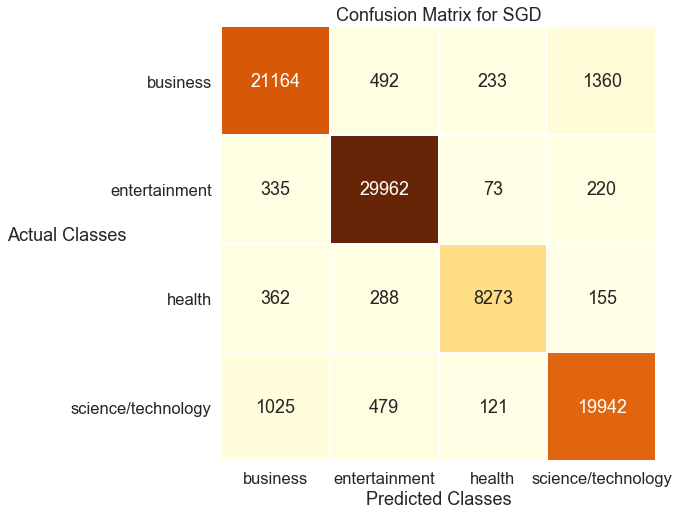

In [191]:
y_pred = sgd.predict(x_test)
matrix = skm.confusion_matrix(y_test, y_pred)
confusion_mat('SGD', matrix)

In [496]:
def predict_categories(model, titles):
    titles = pd.Series(titles)
    titles = titles.str.lower()
    titles = titles.apply(remove_punctuation)
    
    text = vectorizer.transform(titles)

    categories = model.predict(text)
    
    return encoder.inverse_transform(categories)

In [497]:
titles = [
    'The Sea’s Weirdest Creatures, Now in ‘Staggering’ Detail',
    'Watch This Black Hole Blow Bubbles',
    'Falling Jobless Rate Could Imperil Aid Underpinning the Recovery',
    'OPEC and Russia Are Likely to Extend Oil Production Cuts',
    'Doctors Heavily Overprescribed Antibiotics Early in the Pandemic',
    '15 Years Since Tom Cruise Infamously Jumped on Oprah\'s Couch',
    'YouTube is hosting a star-studded tribute to the class of 2020 this weekend',
]

test_df = pd.DataFrame(titles, columns=['title'])

test_df['predicted_category'] = predict_categories(nb, titles)
test_df.sort_values(by='predicted_category')

,title,predicted_category
2,Falling Jobless Rate Could Imperil Aid Underpi...,business
3,OPEC and Russia Are Likely to Extend Oil Produ...,business
1,Watch This Black Hole Blow Bubbles,entertainment
5,15 Years Since Tom Cruise Infamously Jumped on...,entertainment
6,YouTube is hosting a star-studded tribute to t...,entertainment
4,Doctors Heavily Overprescribed Antibiotics Ear...,health
0,"The Sea’s Weirdest Creatures, Now in ‘Staggeri...",science/technology


In [495]:
test_df['predicted_category'] = predict_categories(sgd, titles)
test_df.sort_values(by='predicted_category')

,title,predicted_category
2,Falling Jobless Rate Could Imperil Aid Underpi...,business
3,OPEC and Russia Are Likely to Extend Oil Produ...,business
1,Watch This Black Hole Blow Bubbles,entertainment
5,15 Years Since Tom Cruise Infamously Jumped on...,entertainment
6,YouTube is hosting a star-studded tribute to t...,entertainment
4,Doctors Heavily Overprescribed Antibiotics Ear...,health
0,"The Sea’s Weirdest Creatures, Now in ‘Staggeri...",science/technology


# Neural Network Approach, Keras DATA LEAKAGE

In [481]:
# split into train and test sets
features = news_df[['TITLE']]
labels = news_df[['CATEGORY']]

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((337935, 1), (84484, 1), (337935, 1), (84484, 1))

In [482]:
headline_lengths = [len(x) for x in news_df['TITLE'].values]
print(f'average length of headline text: {np.mean(headline_lengths):.3f} characters')

average length of headline text: 54.902 characters


In [483]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# from keras.utils.np_utils import to_categorical
# from keras.callbacks import EarlyStopping

# turn titles into lists of tokens,
# each token is represented by a number,
# which is its index in the dictionary of 10000 most common unique tokens
# contained in the text it was fitted on, i.e. all the headlines in the dataset

n_most_common_words = 10000
tokenizer = Tokenizer(num_words=n_most_common_words, filters=string.punctuation, lower=True)
tokenizer.fit_on_texts(x_train['TITLE'].values)

x_train = tokenizer.texts_to_sequences(x_train['TITLE'].values)
x_test = tokenizer.texts_to_sequences(x_test['TITLE'].values)

# word_index = tokenizer.word_index
# print('Found %s unique tokens.' % len(word_index))

#X = pad_sequences(sequences, maxlen=max_len)

In [484]:
# set max title length to be used as input to be 200
# pad and truncate as necessary

max_title_length = 200

x_train = pad_sequences(x_train, maxlen=max_title_length)
x_test = pad_sequences(x_test, maxlen=max_title_length)

#features.shape

In [486]:
onehot = OneHotEncoder()
onehot.fit(y_train)

y_train = onehot.transform(y_train)
y_test = onehot.transform(y_test)

#labels = encoder.transform(news_df['CATEGORY'])

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

In [487]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.embeddings import Embedding
from keras.layers import Flatten

embedding_vector_length = 32
model = Sequential()
model.add(Embedding(n_most_common_words, embedding_vector_length, input_length=max_title_length))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 200, 32)           320000    
_________________________________________________________________
flatten_14 (Flatten)         (None, 6400)              0         
_________________________________________________________________
dense_40 (Dense)             (None, 16)                102416    
_________________________________________________________________
dense_41 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_42 (Dense)             (None, 4)                 68        
Total params: 422,756
Trainable params: 422,756
Non-trainable params: 0
_________________________________________________________________
None


In [489]:
hist = model.fit(x_train, y_train.todense(),
                 validation_data=(x_test, y_test.todense()),
                 epochs=5,
                 batch_size=128)

C:\Users\Jonathan\miniconda3\envs\ml_env\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 337935 samples, validate on 84484 samples
Epoch 1/5
337935/337935 [==============================] - 24s 70us/step - loss: 0.1608 - accuracy: 0.9372 - val_loss: 0.0939 - val_accuracy: 0.9659
Epoch 2/5
337935/337935 [==============================] - 23s 69us/step - loss: 0.0829 - accuracy: 0.9699 - val_loss: 0.0855 - val_accuracy: 0.9690
Epoch 3/5
337935/337935 [==============================] - 24s 70us/step - loss: 0.0714 - accuracy: 0.9741 - val_loss: 0.0847 - val_accuracy: 0.9691
Epoch 4/5
337935/337935 [==============================] - 24s 70us/step - loss: 0.0624 - accuracy: 0.9776 - val_loss: 0.0853 - val_accuracy: 0.9682
Epoch 5/5
337935/337935 [==============================] - 24s 70us/step - loss: 0.0535 - accuracy: 0.9812 - val_loss: 0.0899 - val_accuracy: 0.9676


[]

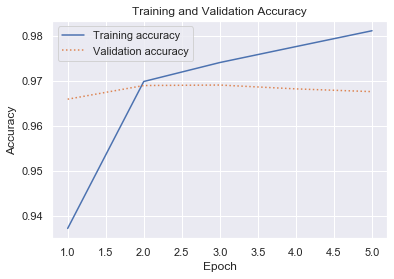

In [490]:
#0.9645
# > 0.9637
# sig0.9669
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.plot()

[]

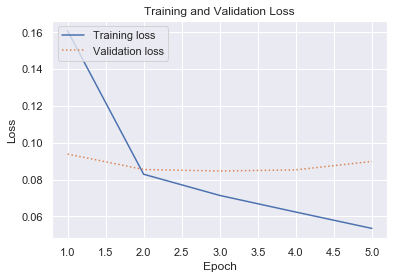

In [491]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
plt.plot(epochs, loss, '-', label='Training loss')
plt.plot(epochs, val_loss, ':', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.plot()

In [492]:
accr = model.evaluate(x_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

84484/84484 [==============================] - 3s 30us/step
Test set
  Loss: 0.090
  Accuracy: 0.968


In [403]:
titles

['The Sea’s Weirdest Creatures, Now in ‘Staggering’ Detail',
 'Watch This Black Hole Blow Bubbles',
 'Falling Jobless Rate Could Imperil Aid Underpinning the Recovery',
 'OPEC and Russia Are Likely to Extend Oil Production Cuts',
 'Doctors Heavily Overprescribed Antibiotics Early in the Pandemic',
 "15 Years Since Tom Cruise Infamously Jumped on Oprah's Couch",
 'YouTube is hosting a star-studded tribute to the class of 2020 this weekend']

In [442]:
#titles = []

sequences = tokenizer.texts_to_sequences(titles)

In [443]:
x = pad_sequences(sequences, maxlen=max_title_length)
x

array([[   0,    0,    0, ...,   72,    3, 5829],
       [   0,    0,    0, ...,  409, 4104, 3081],
       [   0,    0,    0, ..., 1904,    2, 1054],
       ...,
       [   0,    0,    0, ...,    3,    2, 9262],
       [   0,    0,    0, ...,    6, 1598,  544],
       [   0,    0,    0, ..., 4368,   46,  319]])

In [454]:
result = model.predict(x)
result

array([[7.3714689e-03, 2.4435576e-03, 7.0601760e-04, 9.9262035e-01],
       [2.5352389e-01, 3.1917262e-01, 3.7955227e-03, 1.6589580e-01],
       [9.9596292e-01, 7.4472223e-06, 1.1574411e-03, 2.5235934e-03],
       [9.9850625e-01, 3.4604445e-06, 1.9889598e-04, 8.8190398e-04],
       [4.6345234e-04, 3.4451851e-04, 9.9892408e-01, 9.3500130e-04],
       [6.2718995e-05, 9.9956101e-01, 1.7914631e-07, 8.2362196e-05],
       [9.7812660e-02, 4.3413031e-01, 1.0635503e-01, 1.1255365e-02]],
      dtype=float32)

In [460]:
model.predict_classes(x)

array([3, 1, 0, 0, 2, 1, 1], dtype=int64)

In [461]:
#softmax: [3, 3, 0, 0, 2, 1, 1],
#sigmoid: [3, 1, 0, 0, 2, 1, 1]

0.9995905

In [462]:
category_dict

{'b': 'business',
 'e': 'entertainment',
 'm': 'health',
 't': 'science/technology'}

In [506]:
def predict_categories_nn(model, titles):
    
    sequences = tokenizer.texts_to_sequences(titles)
    text = pad_sequences(sequences, maxlen=max_title_length)

    categories = model.predict_classes(text)
    
    return encoder.inverse_transform(categories)

In [507]:
test_df['predicted_category'] = predict_categories_nn(model, titles)
test_df.sort_values(by='predicted_category')

,title,predicted_category
2,Falling Jobless Rate Could Imperil Aid Underpi...,business
3,OPEC and Russia Are Likely to Extend Oil Produ...,business
5,15 Years Since Tom Cruise Infamously Jumped on...,entertainment
6,YouTube is hosting a star-studded tribute to t...,entertainment
4,Doctors Heavily Overprescribed Antibiotics Ear...,health
0,"The Sea’s Weirdest Creatures, Now in ‘Staggeri...",science/technology
1,Watch This Black Hole Blow Bubbles,science/technology
